import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import dataset

In [6]:
rd=pd.read_csv("/content/Iris.csv")


preprocessing steps

In [7]:
rd.describe#chaeck whether we have any null vales

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [8]:
rd.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
graph=rd.corr()

<ipython-input-9-1ababb0beeef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  graph=rd.corr()


#heat map

<Axes: >

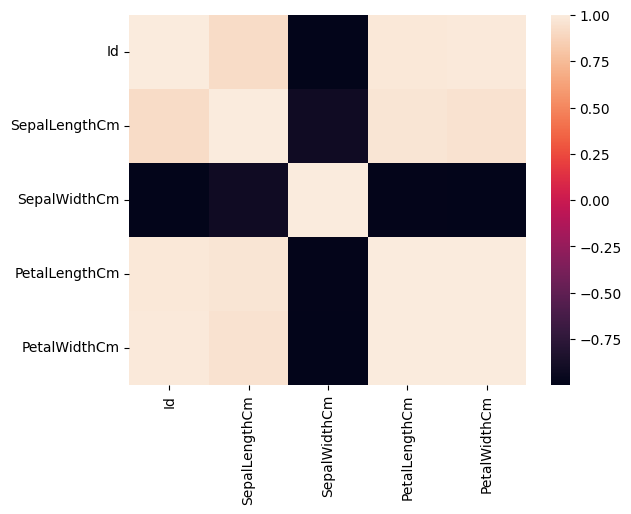

In [34]:
sns.heatmap(graph.corr())

splitting into trainning and testing

In [11]:
x=rd.drop("Species",axis=1)
y=rd.iloc[:,[-1]].values

In [12]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
catogorical_column=['Species']
for i in catogorical_column:
  rd[i]=Label_Encoder.fit_transform(rd[i])

In [13]:
rd.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#heat map after catogorical value into numeric

<Axes: >

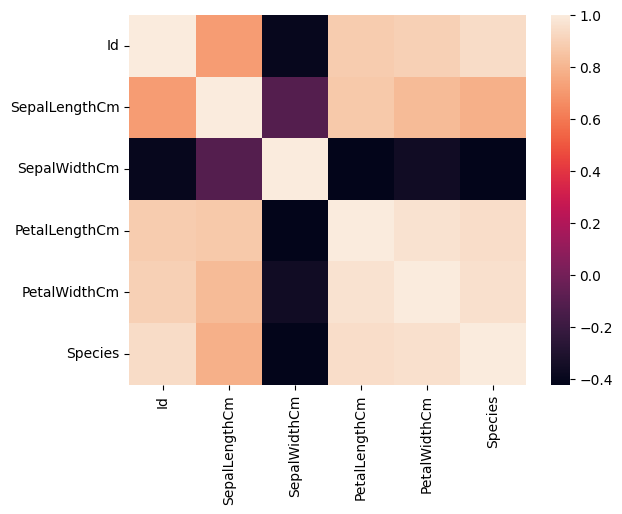

In [14]:
sns.heatmap(rd.corr())

Training the data set

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

import decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

prediction

In [17]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

evaluation test

In [18]:
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred)

In [19]:
accuracy

1.0

In [20]:
classification

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        15\nIris-versicolor       1.00      1.00      1.00        11\n Iris-virginica       1.00      1.00      1.00        12\n\n       accuracy                           1.00        38\n      macro avg       1.00      1.00      1.00        38\n   weighted avg       1.00      1.00      1.00        38\n'

Test your model by inputting new values for sepal length, sepal width, petal length, and petal width to see the predicted species of iris flower.

#use your model to predict your new data

In [35]:
new_data=[[5.1, 3.5, 1.4,2.0,5.0]]#new sepal length,petal length,leaf size
predicted_species=model.predict(new_data)

predicted_species

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)